### AI Verklaring
Tijdens het maken van deze opdracht heb ik **GitHub Copilot** (Claude 4.5, GPT 5.0) gebruikt om te ondersteunen bij het schrijven van code.
Na het gebruik van deze tools heb ik de uitkomsten ervan uitvoerig gecontroleerd en aangepast om ervoor te zorgen dat het ingeleverde werk mijn eigen competenties en leeruitkomsten reflecteert. Ik draag de volledige verantwoordelijkheid voor de inhoud van dit werk.

## 1. Business Understanding

### 1.1 Achtergrond en context
Het Nederlandse zorgstelsel staat onder toenemende druk door vergrijzing en een groeiend tekort aan zorgpersoneel. Vooral bij patiënten met hartfalen komt het vaak voor dat zij opnieuw in het ziekenhuis moeten worden opgenomen vanwege **vochtophoping in de longen (longoedeem)**. Dit veroorzaakt ademhalingsproblemen en hoge zorgkosten.

**HeartGuard** is een initiatief dat inspeelt op deze uitdaging door een **thuismonitoringspatch** te ontwikkelen die vitale functies, zoals hartslag en ademhaling, continu kan meten. Door gebruik te maken van **kunstmatige intelligentie (AI)** kunnen afwijkingen vroegtijdig worden opgespoord, wat ziekenhuisopnames kan helpen voorkomen.

Binnen dit grotere geheel richt het studentenproject **HeartGuard: LungInsight** zich specifiek op het **analyseren van longgeluiden** om vochtretentie in de longen te herkennen. Het doel is om inzicht te krijgen in hoe longgeluiden veranderen bij hartfalen en om te onderzoeken of AI-modellen deze veranderingen kunnen detecteren.

### 1.2 Probleemstelling
Vochtretentie in de longen laat zich niet altijd eenvoudig meten of horen. Hoewel longgeluiden (zoals *crackles* of *wheezes*) indicatoren kunnen zijn, is betrouwbare data schaars en vaak inconsistent. Bestaande datasets verschillen in:

- gebruikte opnameapparatuur en samplefrequentie;  
- opnameposities op de borst;  
- geluidskwaliteit en ruisniveaus;  
- betrouwbaarheid en consistentie van labels.

De belangrijkste **uitdaging** is dus het begrijpen en modelleren van longgeluiden die wijzen op vochtophoping, ondanks de beperkte en heterogene data.

### 1.3 Doelstelling
Het doel van dit project is om een **praktische onderzoeksopzet** te ontwikkelen waarmee hart- en longgeluiden kunnen worden **verwerkt, gevisualiseerd en geanalyseerd**.  
De resultaten moeten bijdragen aan het begrip van longgeluidspatronen bij vocht in de longen, als bouwsteen voor toekomstige detectiemodellen.

Concreet:
- Begrijpen hoe longgeluiden veranderen bij vocht in de longen.  
- Leren werken met digitale stethoscoopdata en spectrogramvisualisaties.  
- Experimenteren met filtering, segmentatie en eenvoudige machine learning-modellen.  
- Documenteren van het volledige proces, zodat toekomstige teams hierop kunnen voortbouwen.

### 1.4 Verwachte resultaten
Aan het eind van de **Business Understanding-fase** verwachten we:
- Een helder geformuleerde onderzoeksvraag binnen het HeartGuard-domein.  
- Inzicht in de relevantie en potentiële impact van longgeluidanalyse voor vroegtijdige detectie van hartfalen.  
- Een eerste overzicht van geschikte datasets en evaluatiecriteria voor datakwaliteit en bruikbaarheid.

## 2. Data Understanding

### 2.1 Beschikbare datasets
Het project maakt gebruik van zowel **publieke datasets** als **eigen opnames**. Voor dit project is vooral de *Heart and Lung Sounds Dataset (HLS-CMDS)* van belang, aangezien deze als referentie dient voor gecontroleerde, goed gedocumenteerde geluidsopnames.

#### HLS-CMDS Dataset
De *Heart and Lung Sounds Dataset Recorded from a Clinical Manikin Using Digital Stethoscope (HLS-CMDS)* is ontwikkeld door McMaster University (2025).  
Het is de eerste dataset die **hart-, long- en gecombineerde opnames** aanbiedt met hoge kwaliteit en consistente annotaties.

Belangrijke eigenschappen:

| Eigenschap | Beschrijving |
|-------------|--------------|
| **Totaal aantal opnames** | 535 `.wav`-bestanden |
| **Categorieën** | 50 hartgeluiden, 50 longgeluiden, 435 gemixte opnames |
| **Sampling rate** | 22.050 Hz |
| **Apparaat** | 3M™ Littmann® CORE Digital Stethoscope |
| **Opnameomgeving** | Geluidsarme, gecontroleerde klinische simulatie |
| **Bron** | CAE Juno™ Nursing Skills Manikin met echte patiëntgeluiden |
| **Metadata** | Locatie, geslacht, type geluid (normaal/abnormaal), sound-ID |
| **Geluidstypes** | 10 hartgeluiden (bijv. S3, S4, atrial fibrillation) en 6 longgeluiden (bijv. crackles, wheezes, pleural rubs) |
| **Gebruikstoepassing** | AI-modellen voor hart- en longziektedetectie, signaalanalyse, bron-scheiding |

#### Overige datasets
Naast HLS-CMDS kunnen ook andere publieke datasets worden verkend:
- **ICBHI 2017 Respiratory Sound Database**
- **King Abdullah Dataset**
- **ALDS-NET Dataset**
- **Eigen Raspberry Pi-opnames** met elektronische stethoscoopkoppen

Deze datasets verschillen in ruisniveaus, opnamecondities en annotatiekwaliteit, wat de mogelijkheid biedt om de generaliseerbaarheid van modellen te testen.

---

### 2.2 Data-acquisitie en kwaliteit
De HLS-CMDS dataset is opgenomen met een **digitale stethoscoop** die elektrische signalen van hart en long omzet naar nauwkeurige digitale audio. De manikin biedt reproduceerbare opnames in een **ruisvrije omgeving**.  
Belangrijke kwaliteitsaspecten zijn:

- **Noise reduction:** ingebouwde frequentiefilters (Bell, Diaphragm, Midrange) en actieve ruisonderdrukking (85%).  
- **Validatie:** handmatige controle van waveforms, consistente opnames op standaard auscultatiepunten.  
- **Uniforme verdeling:** evenwichtige spreiding over geslacht, opnamepositie en geluidstype.

Hoewel deze dataset uitzonderlijk schoon en consistent is, kent ze ook **beperkingen**:
- Gebrek aan realistische omgevingsgeluiden en patiëntvariatie.  
- Manikin-simulatie mist natuurlijke interacties tussen hart en longen.  
- Geen kind- of leeftijdsdiversiteit.  

Voor robuuste modellen is het aan te raden deze data te combineren met **real-world patient recordings**.

---

### 2.3 Data-structuur en annotaties
Elke opname is opgeslagen als `.wav`-bestand, met metadata in CSV-formaat.  
Voorbeelden van metadata:

| Kolom | Beschrijving |
|--------|--------------|
| `file_name` | Naam van het audiobestand |
| `gender` | M / F |
| `hs_type` | Type hartgeluid (bijv. S3, AF, AVB) |
| `ls_type` | Type longgeluid (bijv. NL, W, FC, CC) |
| `location` | Anatomische positie op de borst |
| `sound_id` | Unieke identifier voor gekoppelde mixopnames |

De bestanden zijn verder opgesplitst in:
- **HS.zip** – pure hartgeluiden  
- **LS.zip** – pure longgeluiden  
- **Mix.zip** – gecombineerde HS+LS opnames (inclusief bijbehorende bronnen)

De dataset ondersteunt zowel **supervised learning** (gelabelde HS/LS-klassen) als **unsupervised learning** (clustering, source separation).

---

### 2.4 Data exploratie
Eerste inspectie van de dataset (beschreven in de paper) toont:
- Duidelijke **tijd-domeinvariaties** tussen hart- en longgeluiden.  
- Karakteristieke **frequentiepatronen** in spectrogrammen (crackles tonen hoge energiepieken in korte bursts, wheezes zijn meer sinusvormig en langdurig).  
- Gemixte opnames laten duidelijk zien hoe overlappende frequentiegebieden van hart- en longsignalen elkaar beïnvloeden.

Deze visuele en auditieve eigenschappen vormen een cruciaal uitgangspunt voor:
- Feature-extractie (zoals MFCC’s, spectrale flux, energieverdeling).  
- Segmentatie van ademhalingscycli.  
- Modeltraining voor classificatie of anomaliedetectie.

---

### 2.5 Relevantie voor het project
Voor het HeartGuard: LungInsight project biedt de HLS-CMDS dataset een **ideale referentieomgeving**:
- Ze stelt studenten in staat om filtering, visualisatie en eenvoudige ML-modellen te testen op betrouwbare data.  
- De gecontroleerde opnamecondities helpen om *begrip van geluidskenmerken* te ontwikkelen voordat wordt overgestapt naar real-world data.  
- De dataset bevordert inzicht in **hoe longgeluidspatronen zich manifesteren bij afwijkingen**, wat aansluit bij het doel van het HeartGuard-project: vroegtijdige signalering van vochtretentie bij hartfalen.

---

### 2.6 Conclusie Data Understanding
Samenvattend biedt de HLS-CMDS dataset een rijk, gestructureerd en gecontroleerd startpunt voor audiogerelateerd onderzoek naar hart- en longgeluiden.  
In de context van CRISP-DM vormt dit de basis voor de volgende fasen:

- **Data Preparation:** selectie, filtering en extractie van relevante audiokenmerken;  
- **Modeling:** testen van eenvoudige ML-modellen (zoals CNN of SVM) voor geluidclassificatie;  
- **Evaluation:** beoordelen van de prestaties op basis van nauwkeurigheid, consistentie en robuustheid;  
- **Deployment:** documentatie en reflectie voor toekomstige teams binnen HeartGuard.

In [1]:
import seaborn as sns

import pandas as pd                       # pip install pandas
import numpy as np                        # pip install numpy
import pylab as plt                       # pip install matplotlib
from mpl_toolkits.mplot3d import Axes3D   # pip install matplotlib
from scipy.optimize import minimize, brute    # pip install scipy
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from skimage import io, transform         # pip install scikit-image
from datetime import datetime
from numpy import sin, cos, pi, exp
import os
import yaml                               # pip install pyyaml
import cv2                                # pip install opencv-python
import chromadb
import librosa

import plotly.graph_objects as go

In [2]:
root_dir = "../Data/HLS-CMDS Heart and Lung Sounds Dataset"

def load_audio_file_if_exists(path):
    if not os.path.isfile(path):
        print("File does not exist:", path)
        return (np.nan, None)
    try:
        y, sr = librosa.load(path, sr=None)
        return (y, sr)
    except Exception as e:
        print("Error loading %s: %s", path, e)
        return (np.nan, None)

def load_HLS_CMDS_Data_as_df(root_dir):
    heart_data = pd.DataFrame()
    lung_data = pd.DataFrame()
    mixed_data = pd.DataFrame()
    sounddir = "../Data/HLS-CMDS Heart and Lung Sounds Dataset/HLS-CMDS Heart and Lung Sounds Dataset Recorded from a Clinical Manikin using Digital Stethoscope"
    for subdir, dirs, files in os.walk(root_dir):
        for file in files:
            if file.endswith(".csv"):
                file_path = os.path.join(subdir, file)
                if (file_path.split("\\")[-1].find("HS") != -1):
                    heart_data = pd.read_csv(file_path)
                if (file_path.split("\\")[-1].find("LS") != -1):
                    lung_data = pd.read_csv(file_path)
                if (file_path.split("\\")[-1].find("Mix") != -1):
                    mixed_data = pd.read_csv(file_path)
    
    # change wrong Lung Sound IDs to correct ones
    lung_data.loc[10, "Lung Sound ID"] = "M_FC_LUA"
    lung_data.loc[12, "Lung Sound ID"] = "M_CC_LLA"
    lung_data.loc[13, "Lung Sound ID"] = "M_CC_LUA"
    lung_data.loc[14, "Lung Sound ID"] = "M_FC_LUA"
    lung_data.loc[15, "Lung Sound ID"] = "M_CC_RLA"
    lung_data.loc[21, "Lung Sound ID"] = "M_FC_RUA"
    lung_data.loc[24, "Lung Sound ID"] = "F_CC_LMA"
    lung_data.loc[25, "Lung Sound ID"] = "F_CC_RLA"
    lung_data.loc[26, "Lung Sound ID"] = "M_FC_RLA"
    lung_data.loc[27, "Lung Sound ID"] = "F_CC_RMA"
    lung_data.loc[30, "Lung Sound ID"] = "F_FC_RLA"
    lung_data.loc[33, "Lung Sound ID"] = "F_CC_LLA"
    lung_data.loc[44, "Lung Sound ID"] = "M_CC_LMA"
    lung_data.loc[45, "Lung Sound ID"] = "M_W_LMA"
    lung_data.loc[48, "Lung Sound ID"] = "F_CC_LUA"


    heart_data[["Heart Sound", "SR"]] = heart_data["Heart Sound ID"].apply(lambda x: pd.Series(load_audio_file_if_exists(os.path.join(sounddir, "HS", x + ".wav"))))
    lung_data[["Lung Sound", "SR"]] = lung_data["Lung Sound ID"].apply(lambda x: pd.Series(load_audio_file_if_exists(os.path.join(sounddir, "LS", x + ".wav"))))
    mixed_data[["Mixed Sound", "SRM"]] = mixed_data["Mixed Sound ID"].apply(lambda x: pd.Series(load_audio_file_if_exists(os.path.join(sounddir, "Mix", x + ".wav"))))
    mixed_data[["Lung Sound", "SRL"]] = mixed_data["Lung Sound ID"].apply(lambda x: pd.Series(load_audio_file_if_exists(os.path.join(sounddir, "Mix", x + ".wav"))))
    mixed_data[["Heart Sound", "SRH"]] = mixed_data["Heart Sound ID"].apply(lambda x: pd.Series(load_audio_file_if_exists(os.path.join(sounddir, "Mix", x + ".wav"))))

    return (heart_data, lung_data, mixed_data)

heart_data, lung_data, mixed_data = load_HLS_CMDS_Data_as_df(root_dir)

In [3]:
heart_data

,Gender,Heart Sound Type,Location,Heart Sound ID,Heart Sound,SR
0,F,Normal,RC,F_N_RC,"[-0.0024108887, -0.0024719238, -0.0024719238, ...",4000
1,F,Normal,LC,F_N_LC,"[-0.0047302246, -0.004852295, -0.0048828125, -...",4000
2,M,Normal,RUSB,M_N_RUSB,"[0.0008544922, 0.00076293945, 0.0007019043, 0....",4000
3,F,Normal,LUSB,F_N_LUSB,"[0.00015258789, 0.00015258789, 0.00015258789, ...",4000
4,F,Normal,LLSB,F_N_LLSB,"[-0.0025634766, -0.002166748, -0.0018310547, -...",4000
5,F,Normal,Apex,F_N_A,"[-0.0113220215, -0.011871338, -0.0119018555, -...",4000
6,M,Late Diastolic Murmur,LC,M_LDM_LC,"[0.0024108887, 0.001739502, 0.0018920898, 0.00...",4000
7,M,Mid Systolic Murmur,Apex,M_MSM_A,"[-0.0048217773, -0.0048828125, -0.0046081543, ...",4000
8,F,Normal,RUSB,F_N_RUSB,"[-0.0030212402, -0.0028381348, -0.0026855469, ...",4000
9,F,Mid Systolic Murmur,Apex,F_MSM_A,"[0.0007019043, 0.00076293945, 0.0008239746, 0....",4000


In [4]:
lung_data

,Gender,Lung Sound Type,Location,Lung Sound ID,Lung Sound,SR
0,M,Normal,RUA,M_N_RUA,"[0.0011291504, -0.00045776367, -0.0010070801, ...",4000
1,F,Normal,LUA,F_N_LUA,"[0.0005493164, 0.0013427734, 0.0015869141, 0.0...",4000
2,F,Normal,RMA,F_N_RMA,"[-0.0024108887, -0.005065918, -0.0077209473, -...",4000
3,F,Normal,LMA,F_N_LMA,"[0.0015869141, 0.002166748, 0.002746582, 0.003...",4000
4,M,Normal,RLA,M_N_RLA,"[-0.0002746582, -0.00030517578, -0.00030517578...",4000
5,M,Normal,LLA,M_N_LLA,"[-0.0004272461, -0.00018310547, 3.0517578e-05,...",4000
6,M,Pleural Rub,RMA,M_PR_RMA,"[-0.00033569336, 0.00045776367, 0.00039672852,...",4000
7,M,Pleural Rub,LUA,M_PR_LUA,"[0.0014953613, 0.002380371, 0.0018005371, 0.00...",4000
8,F,Rhonchi,LUA,F_R_LUA,"[-0.0025024414, -0.0022888184, -0.0016784668, ...",4000
9,M,Wheezing,LUA,M_W_LUA,"[-0.009521484, -0.006378174, -0.002380371, 0.0...",4000


In [5]:
mixed_data

,Gender,Heart Sound Type,Lung Sound Type,Location,Heart Sound ID,Lung Sound ID,Mixed Sound ID,Mixed Sound,SRM,Lung Sound,SRL,Heart Sound,SRH
0,F,Late Systolic Murmur,Rhonchi,LUSB,H0001,L0001,M0001,"[0.00036621094, 0.0035095215, 0.0075683594, 0....",4000,"[0.0019836426, 0.0031433105, 0.0036621094, 0.0...",4000,"[-0.00024414062, -0.0002746582, -0.0002746582,...",4000
1,F,S3,Normal,RLA,H0002,L0002,M0002,"[0.0011901855, 0.0017089844, 0.0010986328, 0.0...",4000,"[-0.0048828125, -0.0043640137, -0.0045776367, ...",4000,"[-0.00012207031, 9.1552734e-05, 0.00030517578,...",4000
2,M,Atrial Fibrillation,Normal,LMA,H0003,L0003,M0003,"[-0.005279541, -0.005554199, -0.0039367676, -0...",4000,"[-0.0079956055, -0.008514404, -0.008361816, -0...",4000,"[-0.0055236816, -0.005279541, -0.005065918, -0...",4000
3,F,S3,Coarse Crackles,Apex,H0004,L0004,M0004,"[-0.00018310547, -0.00021362305, -0.0002441406...",4000,"[-0.002319336, -0.0017089844, -0.0013122559, -...",4000,"[-0.0019836426, -0.0018005371, -0.0015869141, ...",4000
4,M,AV Block,Fine Crackles,RUSB,H0005,L0005,M0005,"[0.0095825195, 0.010803223, 0.011505127, 0.011...",4000,"[0.0013122559, 0.001373291, 0.0014038086, 0.00...",4000,"[-0.00592041, -0.0059814453, -0.0059814453, -0...",4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,M,S4,Wheezing,Apex,H0141,L0141,M0141,"[0.018554688, 0.02017212, 0.02178955, 0.023376...",4000,"[0.0005493164, 0.00061035156, 0.0006713867, 0....",4000,"[0.00015258789, 0.00015258789, 0.00015258789, ...",4000
141,F,Mid Systolic Murmur,Normal,RMA,H0142,L0142,M0142,"[-0.009338379, -0.038208008, -0.034820557, -0....",4000,"[0.00024414062, -0.0008544922, -0.0008239746, ...",4000,"[-0.000579834, -0.0005187988, -0.0004272461, -...",4000
142,F,Early Systolic Murmur,Wheezing,RLA,H0143,L0143,M0143,"[-0.021240234, -0.018188477, -0.01373291, -0.0...",4000,"[-0.0011291504, -0.0011901855, -0.0011901855, ...",4000,"[-0.003112793, -0.0024414062, -0.0015563965, -...",4000
143,F,AV Block,Normal,LUA,H0144,L0144,M0144,"[0.010528564, 0.016357422, 0.013458252, -0.002...",4000,"[0.0005493164, 0.0013427734, 0.0015869141, 0.0...",4000,"[0.00033569336, 3.0517578e-05, -0.00045776367,...",4000


In [6]:
# check if there are duplicates in the Sound numpy arrays (exact copies) column of each dataframe
print(heart_data['Heart Sound'].duplicated().sum())
print(lung_data['Lung Sound'].duplicated().sum() + 14)
print(mixed_data['Mixed Sound'].duplicated().sum())
print(mixed_data['Heart Sound'].duplicated().sum())
print(mixed_data['Lung Sound'].duplicated().sum())

0
14
0
0
0


Text(183.59722222222223, 0.5, 'Amplitude (A)')

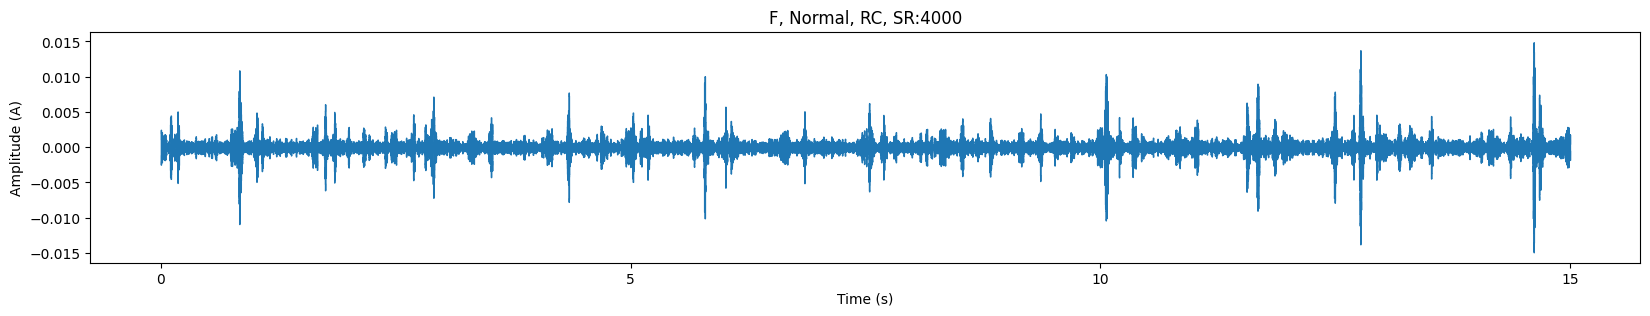

In [13]:
plt.figure(figsize=(20, 3))
librosa.display.waveshow(heart_data.loc[0, 'Heart Sound'], sr=heart_data.loc[0, 'SR'])
plt.title(heart_data.loc[0, 'Gender'] + ", " + str(heart_data.loc[0, 'Heart Sound Type']) + ", " + heart_data.loc[0, 'Location'] + ", SR:" + str(heart_data.loc[0, 'SR']))
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (A)")

Text(0, 0.5, 'Frequency (Hz)')

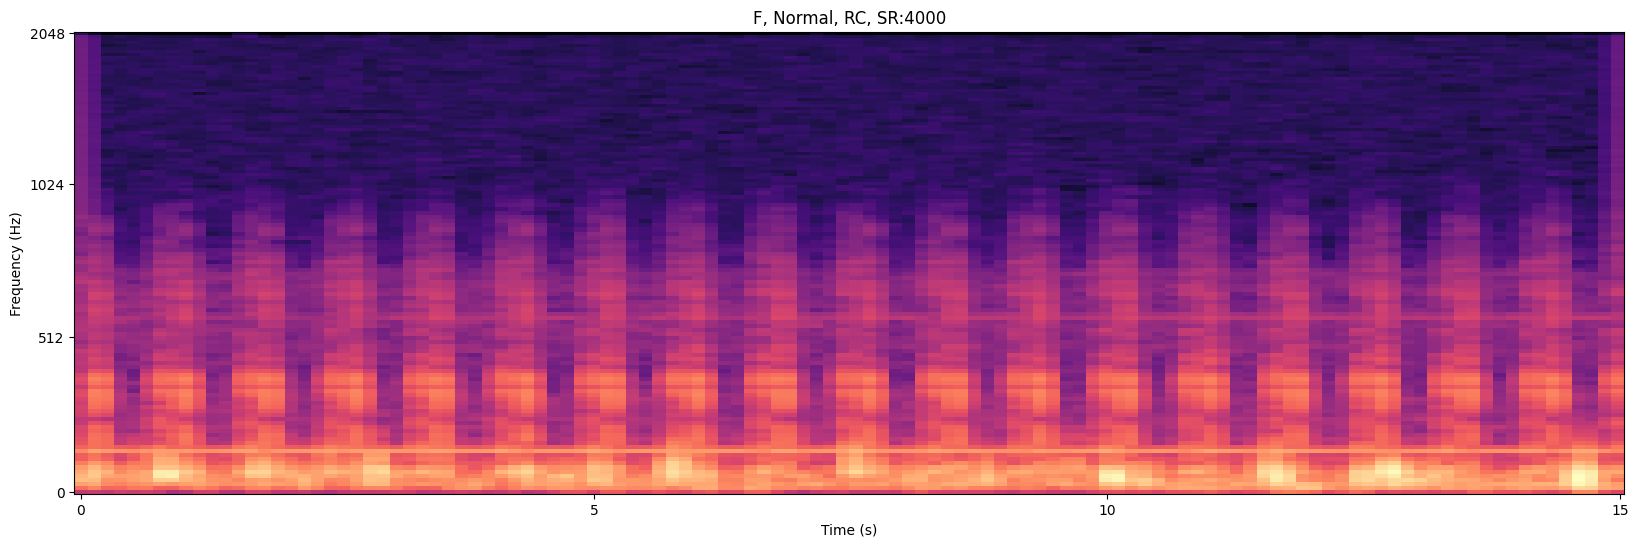

In [15]:
S = librosa.feature.melspectrogram(y=heart_data.loc[0, 'Heart Sound'], sr=heart_data.loc[0, 'SR'], n_mels=128, fmax=2048)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(20, 6))
librosa.display.specshow(S_dB, sr=heart_data.loc[0, 'SR'], x_axis='time', y_axis='mel', fmax=2048)
plt.title(heart_data.loc[0, 'Gender'] + ", " + str(heart_data.loc[0, 'Heart Sound Type']) + ", " + heart_data.loc[0, 'Location'] + ", SR:" + str(heart_data.loc[0, 'SR']))
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")

Text(192.34722222222223, 0.5, 'Amplitude (A)')

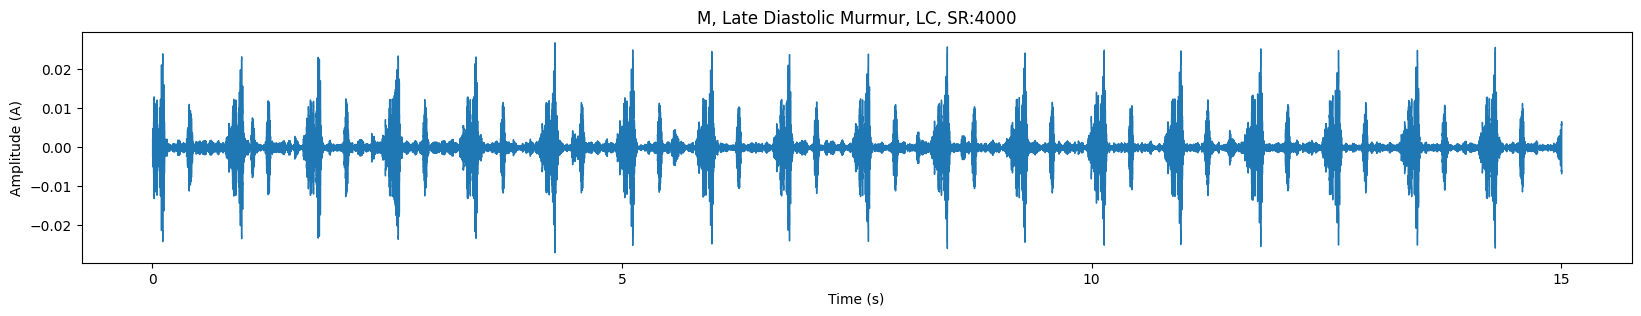

In [16]:
plt.figure(figsize=(20, 3))
librosa.display.waveshow(heart_data.loc[6, 'Heart Sound'], sr=heart_data.loc[6, 'SR'])
plt.title(heart_data.loc[6, 'Gender'] + ", " + str(heart_data.loc[6, 'Heart Sound Type']) + ", " + heart_data.loc[6, 'Location'] + ", SR:" + str(heart_data.loc[6, 'SR']))
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (A)")

In [17]:
def preprocess_audio_signal(y, sr, target_sr=22050, duration_s=15):
    if y is None or np.isnan(y).any() or sr is None:
        return None, None

    # Resample to target sampling rate
    if sr != target_sr:
        y = librosa.resample(y, orig_sr=sr, target_sr=target_sr)
        sr = target_sr
    
    # normalize audio signal to -1.0 to 1.0
    y = y / np.max(np.abs(y))
    
    # Trim or pad to target duration
    target_length = int(target_sr * duration_s)
    if len(y) > target_length:
        y = y[:target_length]
    else:
        y = np.pad(y, (0, max(0, target_length - len(y))), 'constant')
    
    return y, sr

# Preprocess all audio signals in the several dataframes
heart_data[['Heart Sound', 'SR']] = heart_data.apply(lambda row: pd.Series(preprocess_audio_signal(row['Heart Sound'], row['SR'])), axis=1)
lung_data[['Lung Sound', 'SR']] = lung_data.apply(lambda row: pd.Series(preprocess_audio_signal(row['Lung Sound'], row['SR'])), axis=1)
mixed_data[['Mixed Sound', 'SRM']] = mixed_data.apply(lambda row: pd.Series(preprocess_audio_signal(row['Mixed Sound'], row['SRM'])), axis=1)
mixed_data[['Lung Sound', 'SRL']] = mixed_data.apply(lambda row: pd.Series(preprocess_audio_signal(row['Lung Sound'], row['SRL'])), axis=1)
mixed_data[['Heart Sound', 'SRH']] = mixed_data.apply(lambda row: pd.Series(preprocess_audio_signal(row['Heart Sound'], row['SRH'])), axis=1)

Text(201.09722222222223, 0.5, 'Amplitude (A)')

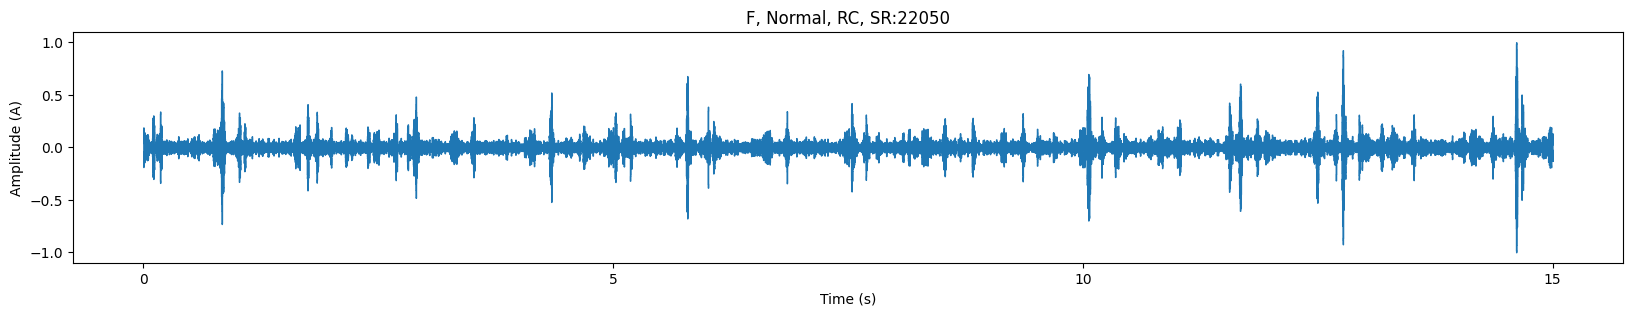

In [18]:
plt.figure(figsize=(20, 3))
librosa.display.waveshow(heart_data.loc[0, 'Heart Sound'], sr=heart_data.loc[0, 'SR'])
plt.title(heart_data.loc[0, 'Gender'] + ", " + str(heart_data.loc[0, 'Heart Sound Type']) + ", " + heart_data.loc[0, 'Location'] + ", SR:" + str(heart_data.loc[0, 'SR']))
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (A)")